## MNIST Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten


In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
model = tf.keras.Sequential([
    #28x28x1
    Convolution2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=input_shape),
    #24x24x6
    MaxPooling2D(pool_size=(2, 2)),
    #12x12x6
    Convolution2D(filters=16, kernel_size=(5,5), activation='relu'),
    #8x8x16
    MaxPooling2D(pool_size=(2, 2)),
    #4x4x16
    Flatten(),
    Dense(128, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=100, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2237 - accuracy: 0.9301 - val_loss: 0.0858 - val_accuracy: 0.9747
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0716 - val_accuracy: 0.9777
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9821 - val_loss: 0.0590 - val_accuracy: 0.9834
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0529 - val_accuracy: 0.9842
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0525 - val_accuracy: 0.9838
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0485 - val_ac

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1031 - val_accuracy: 0.9879
Epoch 58/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0901 - val_accuracy: 0.9891
Epoch 59/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.1178 - val_accuracy: 0.9881
Epoch 60/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.1006 - val_accuracy: 0.9875
Epoch 61/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0874 - val_accuracy: 0.9885
Epoch 62/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.1042 - val_accuracy: 0.9876
Epoch 63/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0950 - val_accuracy

In [9]:
print(model.metrics_names)
print(model.evaluate(X_train, y_train, verbose=2))
print(model.evaluate(X_test, y_test, verbose=2))

['loss', 'accuracy']
1875/1875 - 1s - loss: 0.0347 - accuracy: 0.9969
[0.03466065227985382, 0.9969000220298767]
313/313 - 0s - loss: 0.1421 - accuracy: 0.9879
[0.14209583401679993, 0.9879000186920166]


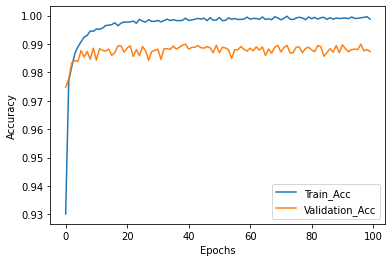

In [12]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.epoch, np.array(history.history['accuracy']), label="Train_Acc")
plt.plot(history.epoch, np.array(history.history['val_accuracy']), label="Validation_Acc")
plt.legend()
plt.show()

## Cifar-10 Classifier

In [15]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_Test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
img_rows, img_cols = 32, 32
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
model = tf.keras.models.Sequential([
     # 32x32x3
     Convolution2D(filters=6, kernel_size=(5,5), activation = 'relu', input_shape=input_shape),
     # 28x28x6
     MaxPooling2D(pool_size=(2, 2)),
     # 14x14x6
     Convolution2D(filters=16, kernel_size=(5,5), activation = 'relu'),
     # 10x10x16
     MaxPooling2D(pool_size=(2, 2)),
     # 5x5x16
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(84, activation = 'relu'),
     Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=100, verbose=1)

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6754 - accuracy: 0.3900 - val_loss: 1.4883 - val_accuracy: 0.4550
Epoch 2/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3761 - accuracy: 0.5041 - val_loss: 1.3649 - val_accuracy: 0.5212
Epoch 3/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2553 - accuracy: 0.5530 - val_loss: 1.2546 - val_accuracy: 0.5542
Epoch 4/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1707 - accuracy: 0.5867 - val_loss: 1.1957 - val_accuracy: 0.5757
Epoch 5/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.6113 - val_loss: 1.1670 - val_accuracy: 0.5905
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0369 - accuracy: 0.6326 - val_loss: 1.1191 - val_accuracy: 0.6115
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9844 - accuracy: 0.6524 - val_loss: 1.0955 - val_ac

1250/1250 [==============================] - 3s 2ms/step - loss: 0.1876 - accuracy: 0.9334 - val_loss: 3.4066 - val_accuracy: 0.5805
Epoch 58/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1659 - accuracy: 0.9413 - val_loss: 3.3971 - val_accuracy: 0.5793
Epoch 59/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1612 - accuracy: 0.9437 - val_loss: 3.4589 - val_accuracy: 0.5738
Epoch 60/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1760 - accuracy: 0.9372 - val_loss: 3.5510 - val_accuracy: 0.5737
Epoch 61/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1753 - accuracy: 0.9384 - val_loss: 3.5358 - val_accuracy: 0.5762
Epoch 62/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1774 - accuracy: 0.9380 - val_loss: 3.4658 - val_accuracy: 0.5755
Epoch 63/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1454 - accuracy: 0.9492 - val_loss: 3.6425 - val_accuracy

In [20]:
print(model.metrics_names)
print(model.evaluate(X_train, y_train, verbose=2))
print(model.evaluate(X_test, y_test, verbose=2))

['loss', 'accuracy']
1563/1563 - 2s - loss: 1.0391 - accuracy: 0.8824
[1.0390892028808594, 0.8823999762535095]
313/313 - 0s - loss: 28.7575 - accuracy: 0.1003
[28.75748062133789, 0.10029999911785126]


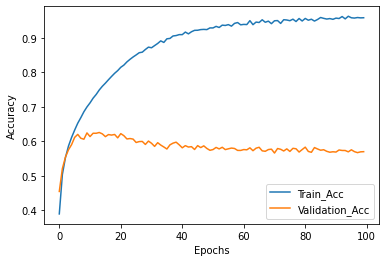

In [21]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.epoch, np.array(history.history['accuracy']), label="Train_Acc")
plt.plot(history.epoch, np.array(history.history['val_accuracy']), label="Validation_Acc")
plt.legend()
plt.show()